# Section 1: Introduction to coding in R

Today, we will look at some coding in R. You will be learning how to:
* Read in data
* Clean data
* Summarize data
* Visualize/plot data




By now, you should know how to read in data. I will not be going over this. Instead, I will just show a piece of code that generates the dataset which we will be using. This can be useful for various things. 

You do not need to understand everything in this section.

In [1]:
# Install packages if not yet installed
if (!require(wooldridge)) install.packages("wooldridge")
if (!require(tidyverse)) install.packages("tidyverse")

library(wooldridge)
library(tidyverse)

Loading required package: wooldridge

Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## 1. Reading in a Wooldridge dataset

We use the wage1 dataset from Wooldridge (wages, education, experience, etc.).

In [2]:
data("wage1")
head(wage1)

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,⋯,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
1,3.10,11,2,0,0,1,0,2,1,0,⋯,0,0,0,0,0,0,0,1.131402,4,0
2,3.24,12,22,2,0,1,1,3,1,0,⋯,0,0,1,0,0,0,1,1.175573,484,4
3,3.00,11,2,0,0,0,0,2,0,0,⋯,0,1,0,0,0,0,0,1.098612,4,0
4,6.00,8,44,28,0,0,1,0,1,0,⋯,0,0,0,0,0,1,0,1.791759,1936,784
5,5.30,12,7,2,0,0,1,1,0,0,⋯,0,0,0,0,0,0,0,1.667707,49,4
6,8.75,16,9,8,0,0,1,0,1,0,⋯,0,0,0,1,1,0,0,2.169054,81,64


## 2. Cleaning data with tidyverse

We show how to:

* Rename variables
* Drop missing values
* Create new variables

In [3]:
wage_clean <- wage1 %>%
  rename(education = educ,
         experience = exper,
         wage = wage) %>%
  drop_na() %>%
  mutate(ln_wage = log(wage))

head(wage_clean)

,wage,education,experience,tenure,nonwhite,female,married,numdep,smsa,northcen,⋯,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq,ln_wage
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>
1,3.10,11,2,0,0,1,0,2,1,0,⋯,0,0,0,0,0,0,1.131402,4,0,1.131402
2,3.24,12,22,2,0,1,1,3,1,0,⋯,0,1,0,0,0,1,1.175573,484,4,1.175573
3,3.00,11,2,0,0,0,0,2,0,0,⋯,1,0,0,0,0,0,1.098612,4,0,1.098612
4,6.00,8,44,28,0,0,1,0,1,0,⋯,0,0,0,0,1,0,1.791759,1936,784,1.791759
5,5.30,12,7,2,0,0,1,1,0,0,⋯,0,0,0,0,0,0,1.667707,49,4,1.667707
6,8.75,16,9,8,0,0,1,0,1,0,⋯,0,0,1,1,0,0,2.169054,81,64,2.169054


## 3. Summarising data with tidyverse

We can use tidyverse to summarize data.

In [4]:
wage_summary <- wage_clean %>%
  summarise(
    mean_wage = mean(wage, na.rm = TRUE),
    median_wage = median(wage, na.rm = TRUE),
    sd_wage = sd(wage, na.rm = TRUE),
    n_obs = n()
  )

wage_summary

mean_wage,median_wage,sd_wage,n_obs
<dbl>,<dbl>,<dbl>,<int>
5.896103,4.65,3.693086,526


We can also summary data by groups. For example, let us compare wages for female and male respondents in the dataset.

In [5]:
wage_by_gender <- wage1 %>%
  group_by(female) %>%
  summarise(
    mean_wage = mean(wage, na.rm = TRUE),
    median_wage = median(wage, na.rm = TRUE),
    sd_wage = sd(wage, na.rm = TRUE),
    n = n()
  )

wage_by_gender

female,mean_wage,median_wage,sd_wage,n
<int>,<dbl>,<dbl>,<dbl>,<int>
0,7.099489,6.00,4.160858,274
1,4.587659,3.75,2.529363,252


## 4. Plotting data

We can use ggplot to visualize data and generate a variety of plots to understand our data better. Here is an example of a scatterplot showing the relationship between education and wages.

`geom_smooth()` using formula = 'y ~ x'


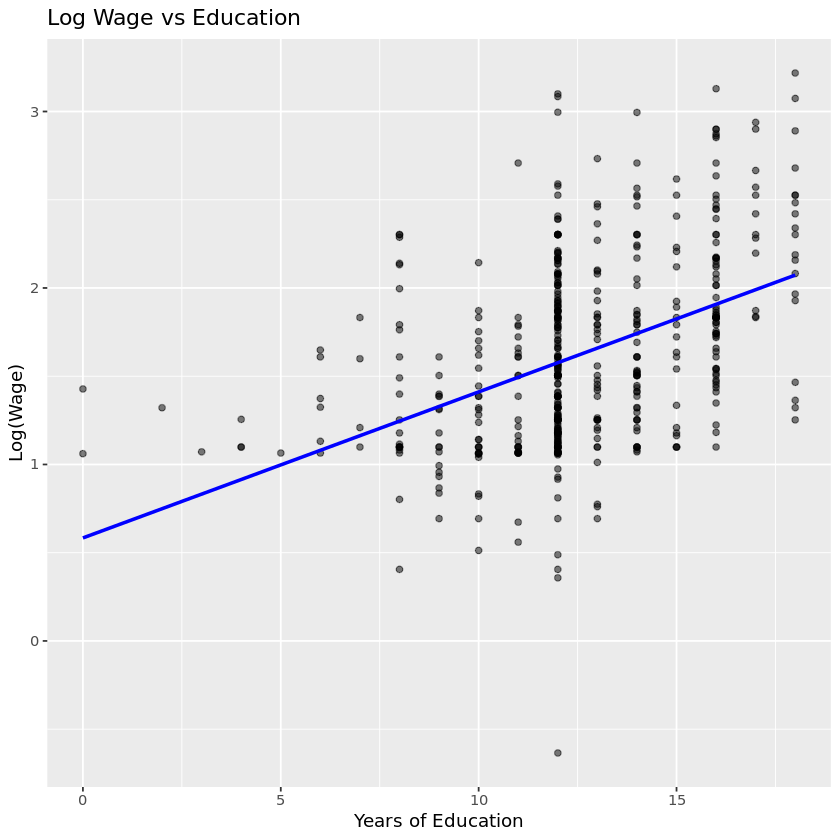

In [6]:
ggplot(wage_clean, aes(x = education, y = ln_wage)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Log Wage vs Education",
       x = "Years of Education",
       y = "Log(Wage)")

In [7]:
print("Thank you!")

[1] "Thank you!"
